# Deep Learning Practical Exam (Test 1)

#Jenil Gathani (J061) 

#B.tech Data Science 3rd Year

In [0]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from sklearn.model_selection import GridSearchCV

In [0]:
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [0]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [0]:
# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [50]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [0]:
# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [53]:
# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2284 - acc: 0.9298 - val_loss: 0.1035 - val_acc: 0.9675
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0834 - acc: 0.9741 - val_loss: 0.0903 - val_acc: 0.9703
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0557 - acc: 0.9831 - val_loss: 0.0922 - val_acc: 0.9739
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0396 - acc: 0.9879 - val_loss: 0.0717 - val_acc: 0.9810
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0304 - acc: 0.9905 - val_loss: 0.0734 - val_acc: 0.9805
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0231 - acc: 0.9927 - val_loss: 0.0799 - val_acc: 0.9818
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0176 - acc: 0.9948 - val_loss: 0.1081 - val_acc

In [54]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09398262414779983
Test accuracy: 0.9815


In [0]:
import keras
from keras import optimizers
sgd= keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

In [56]:
# Compile model using above optimizer
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0039 - acc: 0.9988 - val_loss: 0.0857 - val_acc: 0.9837
Epoch 2/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0845 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0838 - val_acc: 0.9836
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0018 - acc: 0.9997 - val_loss: 0.0835 - val_acc: 0.9833
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0016 - acc: 0.9998 - val_loss: 0.0832 - val_acc: 0.9833
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0829 - val_acc: 0.9835
Epoch 7/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0014 - acc: 0.9999 - val_loss: 0.0828 - val_acc

In [0]:
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [58]:
# Compile model using above optimizer
model.compile(optimizer=rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0095 - acc: 0.9970 - val_loss: 0.1006 - val_acc: 0.9830
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0085 - acc: 0.9974 - val_loss: 0.1104 - val_acc: 0.9821
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0074 - acc: 0.9978 - val_loss: 0.1147 - val_acc: 0.9837
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0066 - acc: 0.9982 - val_loss: 0.1314 - val_acc: 0.9801
Epoch 5/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0056 - acc: 0.9983 - val_loss: 0.1360 - val_acc: 0.9809
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0069 - acc: 0.9981 - val_loss: 0.1303 - val_acc: 0.9834
Epoch 7/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0051 - acc: 0.9986 - val_loss: 0.1256 - val_acc

In [0]:
ada=keras.optimizers.Adagrad(lr=0.01)

In [60]:
# Compile model using above optimizer
model.compile(optimizer=ada,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0266 - acc: 0.9960 - val_loss: 0.1229 - val_acc: 0.9834
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 8.9491e-04 - acc: 0.9999 - val_loss: 0.1192 - val_acc: 0.9834
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 6.8101e-04 - acc: 1.0000 - val_loss: 0.1145 - val_acc: 0.9840
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 5.6994e-04 - acc: 1.0000 - val_loss: 0.1142 - val_acc: 0.9843
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 5.6211e-04 - acc: 1.0000 - val_loss: 0.1144 - val_acc: 0.9843
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 5.5900e-04 - acc: 1.0000 - val_loss: 0.1146 - val_acc: 0.9842
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 5.5681e-04 - acc: 1.0000 - va

In [0]:
adelta=keras.optimizers.Adadelta(lr=1.0, rho=0.95)

In [62]:
# Compile model using above optimizer
model.compile(optimizer=adelta,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 5.5154e-04 - acc: 1.0000 - val_loss: 0.1156 - val_acc: 0.9840
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 5.4945e-04 - acc: 1.0000 - val_loss: 0.1162 - val_acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 5.4793e-04 - acc: 1.0000 - val_loss: 0.1166 - val_acc: 0.9840
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 5.4678e-04 - acc: 1.0000 - val_loss: 0.1169 - val_acc: 0.9840
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 5.4588e-04 - acc: 1.0000 - val_loss: 0.1171 - val_acc: 0.9840
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 5.4519e-04 - acc: 1.0000 - val_loss: 0.1174 - val_acc: 0.9840
Epoch 7/10
60000/60000 [==============================] - 2s 36us/step - loss: 5.4462e-04 - acc: 1.0000 

In [0]:
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [64]:
# Compile model using above optimizer
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0201 - acc: 0.9953 - val_loss: 0.1314 - val_acc: 0.9791
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0133 - acc: 0.9962 - val_loss: 0.1247 - val_acc: 0.9812
Epoch 3/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0107 - acc: 0.9972 - val_loss: 0.1174 - val_acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0137 - acc: 0.9962 - val_loss: 0.1206 - val_acc: 0.9790
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0104 - acc: 0.9971 - val_loss: 0.1230 - val_acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0079 - acc: 0.9978 - val_loss: 0.1008 - val_acc: 0.9829
Epoch 7/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0116 - acc: 0.9971 - val_loss: 0.1202 - val_acc

In [0]:
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

In [66]:
# Compile model using above optimizer
model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train model
history = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=Epochs,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.1104 - val_acc: 0.9843
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 6.0581e-04 - acc: 1.0000 - val_loss: 0.1075 - val_acc: 0.9845
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 5.6234e-04 - acc: 1.0000 - val_loss: 0.1077 - val_acc: 0.9847
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 5.5303e-04 - acc: 1.0000 - val_loss: 0.1082 - val_acc: 0.9851
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 5.4813e-04 - acc: 1.0000 - val_loss: 0.1093 - val_acc: 0.9853
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 5.4469e-04 - acc: 1.0000 - val_loss: 0.1106 - val_acc: 0.9852
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 5.4237e-04 - acc: 1.0000 - va

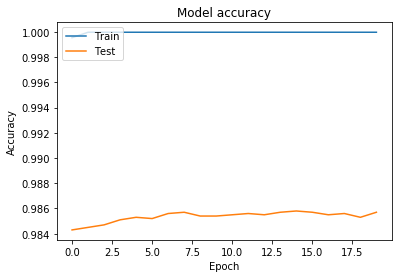

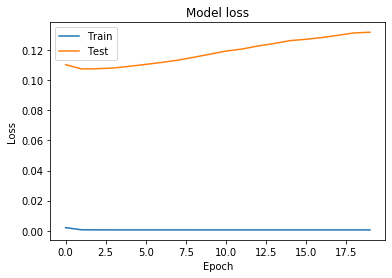

In [67]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


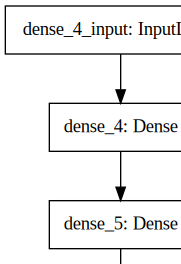

In [69]:
# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))